<a href="https://colab.research.google.com/github/mohith17/tada/blob/main/U2_clothing_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification of images in clothing

we will use a ReLU and the dataset will be 28*28 greyscale images

we have like 70,000 of them in which we will use 60,000 as training data and 10,000 as testing data.

all the best to me :)
***

now let's install a library called tensorflow_datasets, where we will have the above fashion mnist dataset

In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now let's import the libs we use

In [2]:
from __future__ import absolute_import, division, print_function

#tensoerflow and tensorflow datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
#the above code is used to see a progress bar, like how much of the data is
#trained, etc... it's like the loading in a screen. :)


print(tf.__version__)


#tf.enable_eager_execution()

#why ? This can be useful for debugging. As the code now runs line-by-line, 
#you can add arbitrary print messages or pdb breakpoints to monitor the 
#inputs/outputs of each Tensorflow operation.

# and

#Tensorflow 2.0 has eager_execution enabled by default and so there is 
#no need for you to run tf.enable_eager_execution. Only if your running 
#versions below 2.0 should you enable eager execution

#to check 
tf.executing_eagerly()

#@https://stackoverflow.com/questions/58406191/attributeerror-module-tensorflow-has-no-attribute-enable-eager-execution
#to know more about >> like disabling it, etc




2.12.0


True

loading the fashion mnist dataset

That is so easy, we can just name it and it will split and give the data for us oh i am so glad

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteG3XQKL/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteG3XQKL/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


Now, we create the output names,

like internally, they all are numbers, but we can't map shoes to 3 and shirts to 5 lol. so yaaa

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

let's now explore the data, cause we never know!

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples : {}".format(num_train_examples))
print("Number of testing examples : {}".format(num_test_examples))

Number of training examples : 60000
Number of testing examples : 10000


Cool, now it's the time for pre-processing 

now the thing is even they are grey scale images the pixels are in range of [0,255] both included
but machine can work best with [0,1]... therefore we first normalize the data and then


processing a.k.a flattening

the 2-d images should be converted to 1-d array,,
it's like 28*28 == 784.

In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#now the map function applies the normalize function to each element 
#in the train and test datasets

train_datasets = train_dataset.map(normalize)
test_datasets = test_dataset.map(normalize)

exploring the pre processed data, it will be damn coool

<function matplotlib.pyplot.show(close=None, block=None)>

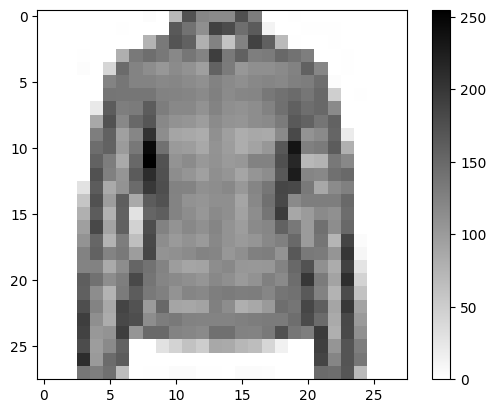

In [7]:
#take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

#plot the image - 
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

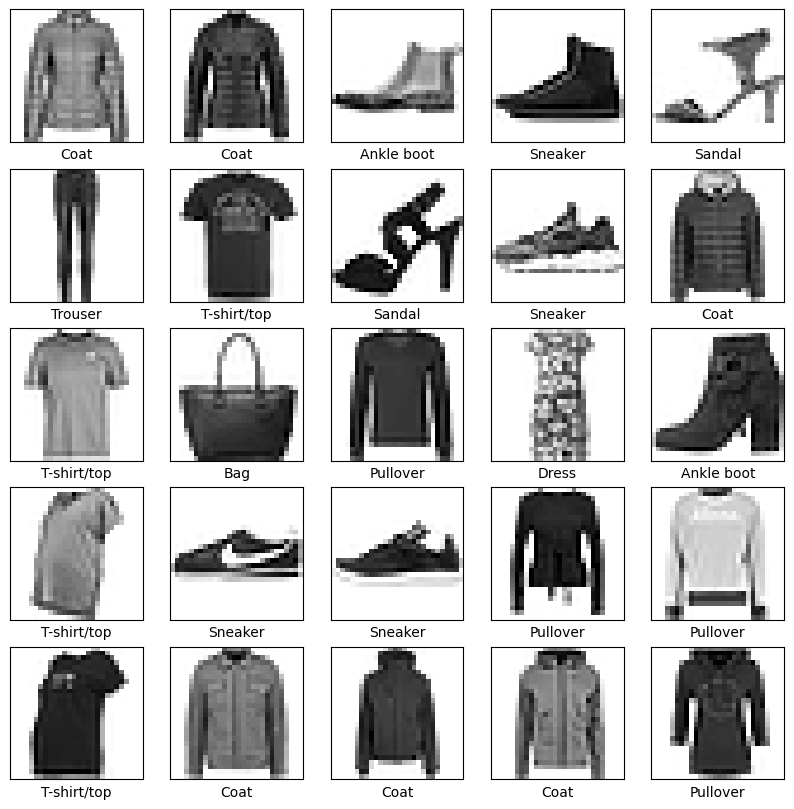

In [8]:
plt.figure(figsize=(10,10))
i=0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show

Super cool,

now it's time to build the model...

## 1st input layer::

we need to flatten the data into single array > we do that using Flatten method, the rest layers are same like the usual.

i have written a long story on ReLU but ntg on softmax in notes:

So basically, softmax is used for probabilty distribution.

In [9]:
l0 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
l2 = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)

model = tf.keras.Sequential([l0,l1,l2])

Now compiling the model

note 1 : in optimizer='adam' will work too, cause it will take the default but I like to stick with this

###note 2 : loss='sparse_categorical_crossentropy' 

this is new more reaserch on this is needed : 

###note 3 : metrics=['accuracy']

this is new too, please check and update

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

Train the model

Unlike the prev model this is complex for better results we will suffele the training datasets and train it will be nice

just follow the below lines of code closely



In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
#as the model trains the loss and accuracy are displayed :)

Epoch 1/5
1875/1875 [==============================] - 15s 3ms/step - loss: 2.5707 - accuracy: 0.6725
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6972 - accuracy: 0.7225
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5886 - accuracy: 0.7862
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5492 - accuracy: 0.8038
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5079 - accuracy: 0.8170


well i first ran it for 5epochs then i got 82 something

then a 10 more i got 84 something

then a 5 more i got like 85 now,

im gonna increase the batch size to 64 and run for 5 epochs...
let's see where will end up!

### ERROR
BATCH_SIZE = 64

train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)

test_dataset=test_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)

no error for this but below is the prob

model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Error is : 
```
Epoch 1/5
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-26-8ed533787d52> in <cell line: 1>()
----> 1 model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

1 frames
/usr/local/lib/python3.10/dist-packages/keras/engine/training.py in tf__train_function(iterator)
     13                 try:
     14                     do_return = True
---> 15                     retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
     16                 except:
     17                     do_return = False

TypeError: in user code:
```

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1055, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1149, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/metrics/base_metric.py", line 691, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/metrics/accuracy_metrics.py", line 462, in sparse_categorical_accuracy
        if matches.shape.ndims > 1 and matches.shape[-1] == 1:

    TypeError: '>' not supported between instances of 'NoneType' and 'int'

and the link is "https://stackoverflow.com/questions/70144164/typeerror-in-user-code-while-using-model-fit"

***
***
***

Well 64 might be a bad idea let's go with 16 ehehe

sometimes ium sooo dumb,

```
BATCH_SIZE = 16
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)
```
no error
```
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
```
same like the error for 64 BATCH_SIZE
***

okay so the problem is the model is getting fitted by 32, and now u have to follow that nahhh,

bad explanation i know but ya defenitly something related to this :)

anyways if i keep on running the accuracy will increase nahhh, so i'll run for 30epochs T_T, so tioring this is.

In [13]:
model.fit(train_dataset, epochs=30, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
#as the model trains the loss and accuracy are displayed :)

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5007 - accuracy: 0.8244
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4948 - accuracy: 0.8294
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4872 - accuracy: 0.8315
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4822 - accuracy: 0.8335
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4621 - accuracy: 0.8372
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4633 - accuracy: 0.8424
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4541 - accuracy: 0.8437
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4454 - accuracy: 0.8477
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4508 - accuracy: 0.8446
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4

Cool now, maybe using the learning rate is causing the problem and boy i am soo right.

### anyways, let's Evaluate accuracy

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset = {}".format(test_accuracy))
print("loss on test dataset = {}".format(test_loss))

313/313 [==============================] - 2s 3ms/step - loss: 0.5838 - accuracy: 0.8243
Accuracy on test dataset = 0.8242811560630798
loss on test dataset = 0.583848237991333


Make predictions and exploring the data

In [15]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  prediction = model.predict(test_images)

1/1 [==============================] - 0s 132ms/step


In [16]:
prediction.shape

(32, 10)

In [17]:
prediction[0]

array([9.9646759e-01, 1.1795118e-09, 3.7330748e-14, 8.6563404e-08,
       2.3530299e-13, 0.0000000e+00, 3.5323072e-03, 0.0000000e+00,
       1.7998922e-25, 0.0000000e+00], dtype=float32)

In [19]:
  np.argmax(prediction[0])

0

In [21]:
test_labels[0]

0

Let's do some graphing...

the below code will be copy pasted cause i have no intrest in plotting and also i like the wasy of plots in the source

In [22]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

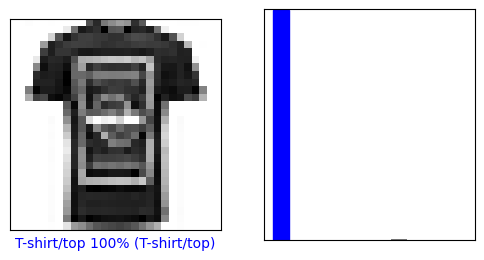

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

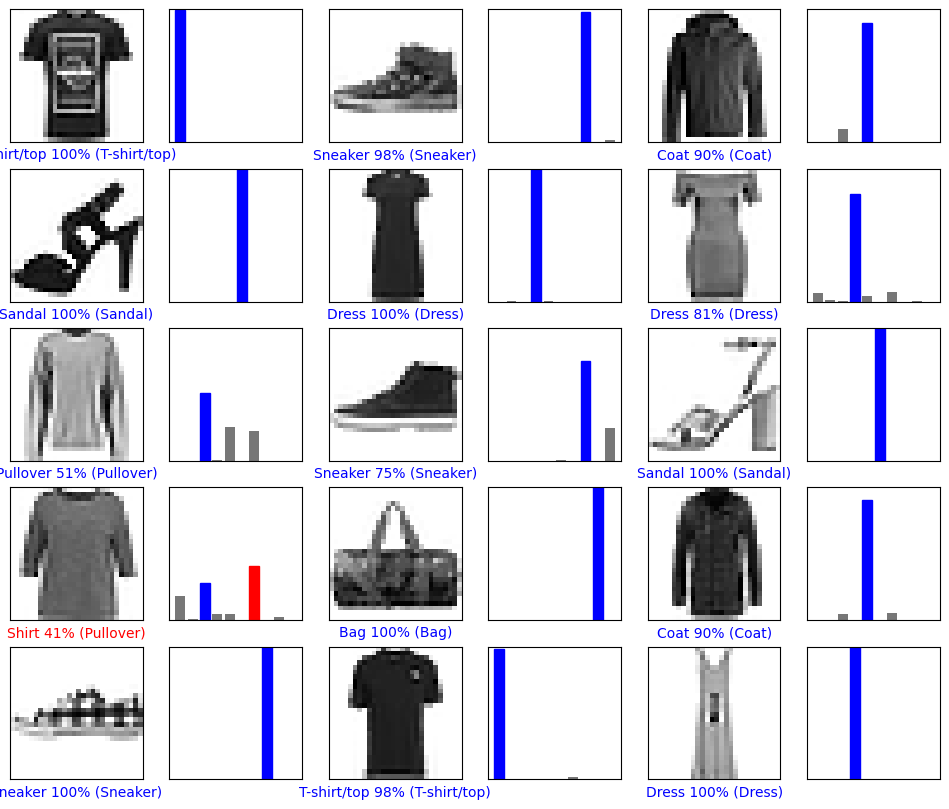

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)


Finally, use the trained model to make a prediction about a single image. 

In [27]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


### tf.keras 
models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


Now predict the image:

In [29]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 109ms/step
[[9.9646759e-01 1.1795118e-09 3.7330175e-14 8.6563404e-08 2.3530120e-13
  0.0000000e+00 3.5323072e-03 0.0000000e+00 1.7998716e-25 0.0000000e+00]]


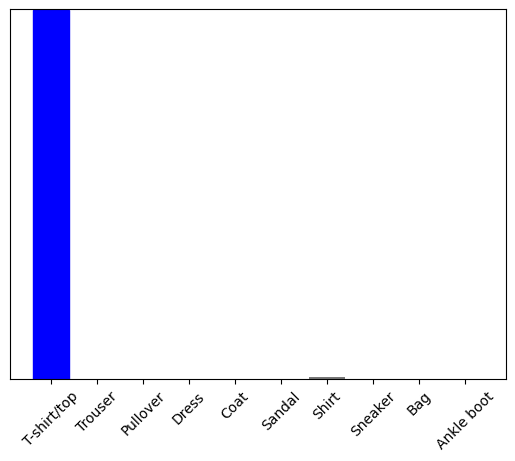

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

0

And, as before, the model predicts a label of 0 (shirt).
***
***